In [1]:
import pandas as pd
import re

In [2]:
# df1_gln = pd.read_csv('/Volumes/LaCie/phospho_white_list/PXD006449/2021-08-24-14-06-06/Task2-search/Individual File Results/20130426_SK_SA_marta_phospho_8_gln_1_PSMs.psmtsv',sep='\t')

# df1 = pd.read_csv('/Volumes/LaCie/phospho_white_list/PXD006449/2021-08-24-14-06-06/Task2-search/Individual File Results/20130426_SK_SA_marta_phospho_8_1_PSMs.psmtsv',sep='\t')
# df1['dataset'] = 'PXD006449'

df1_gln = pd.read_csv('20130426_SK_SA_marta_phospho_8_gln_1_PSMs.psmtsv',sep='\t')

df1 = pd.read_csv('20130426_SK_SA_marta_phospho_8_1_PSMs.psmtsv',sep='\t')


# xls = pd.ExcelFile('/Volumes/LaCie/phospho_white_list/PXD000472/Supplementary_Dataset_1.xlsx')
xls = pd.ExcelFile('Supplementary_Dataset_1.xlsx')
df2 = pd.read_excel(xls, 'Phosphopeptide Features')


# df3 = pd.read_csv('PXD013503/Holz_MCF7_TMT_PP_01_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')
df3 = pd.read_excel('144972_1_supp_335637_prw13z.xlsx')


There are 3 datasets:

    PXD006449:
        3 growth conditions, 8hr and 24hr.
        MEM with gln - control
        MEM without gln - stress, loss of natural c source
        MEM with gln and Oligomyocin - tumor/hypoxia simulation

    PXD000472:
        2 air/temp conditions.
        control, 15 min, 2hr.

    PXD013503:
        Phosphoproteomic data from human MCF-7 cells treated with estrogen only or estrogen plus rapamycin, an mTOR inhibitor.


    Each one indicates modifications differently. 
        Metamopheus: [Common Biological:Phosphorylation on S]
        MSGFPlus: K.+229.163DEDS+79.966DDDDGS+79.966S+79.966AGC
        MaxQuant: SAS^PY^PSHSLS^SPQRPSHSLS^

We are going to format them using the S^ method. 

In [3]:
#S^ s is phosphorylated
#S+79
#[phos on S]

def format_MM_mod(row):
    peptide = row['Full Sequence']
    newpep = re.sub('\[.*?\]', "^",peptide)
    return newpep

# +229: TMT on N terminal
# Just get rid of this (the +229)
def format_msgf_mod(row):
#     import pdb;pdb.set_trace()
    peptide = row['Peptide']
    newpep = re.sub('\+[\d+\.]+', "^", peptide)
    if newpep[0:1] == '^':
        newpep = newpep[1:]
        
    return newpep

def format_013503_mod(row):
    peptide = row['Peptide']
    newpep = re.sub('\*', "^", peptide)
    #remove the .
    newpep = newpep[:-2]
    newpep = newpep[2:]
    if newpep[0:1] == '^':
        newpep = newpep[1:]
        
    return newpep
 

In [4]:
df1['peptide'] = df1.apply(format_MM_mod, axis=1)
df1_gln['peptide'] = df1_gln.apply(format_MM_mod, axis=1)
df2['peptide'] = df2['pSequence']
# df3['peptide'] = df3.apply(format_msgf_mod, axis=1)
df3['peptide'] = df3.apply(format_013503_mod, axis=1)



In [5]:
#Now they're all formated the same, lets get a list of intersecting peptides

In [6]:
df1_list = list(set(df1['peptide']) & set(df1_gln['peptide']))
df1_df2 = list(set(df1_list) & set(df2['peptide']))
df2_df3 = list(set(df2['peptide']) & set(df3['peptide']))
df1_df3 = list(set(df1_list) & set(df3['peptide']))
df1_df2_df3 = list(set(df1_list) & set(df2['peptide']) & set(df3['peptide']))

In [7]:
print(len(df1_list))
print(len(set(df2['peptide'])))
print(len(set(df3['peptide'])))

print()
print(len(set(df1_list).difference(*[list(df2['peptide'].unique()),list(df3['peptide'].unique())])))
print(len(set(df2['peptide'].unique()).difference(*[list(df1_list),list(df3['peptide'].unique())])))
print(len(set(df3['peptide'].unique()).difference(*[list(df1_list),list(df2['peptide'].unique())])))


print()
print(len(df1_df2))
print(len(df2_df3))
print(len(df1_df3))
print(len(df1_df2_df3))

4440
2977
10718

4013
2108
9901

287
677
235
95


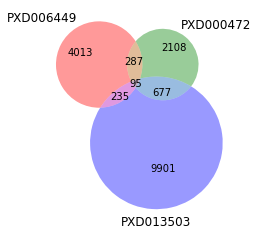

In [8]:
from matplotlib_venn import venn3
venn3(subsets = (4013, 2108 , 287,
                 9901,
                 235, 677,
                 95
                ), set_labels = ('PXD006449', 'PXD000472', 'PXD013503'))

## Get a list of all intersections

In [9]:
95+235+677

1007

In [10]:
all_inter = set(df2_df3 + df1_df3 + df1_df2_df3)
len(all_inter)

817

In [11]:
#get the intensity based on precursor intensity

In [12]:
len(list(df3['peptide'].unique()))

10718

In [13]:
pnnl_df1 = pd.read_csv('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_01_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')
pnnl_df2 = pd.read_csv('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_02_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')
pnnl_df3 = pd.read_csv('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_03_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')
pnnl_df4 = pd.read_csv('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_04_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')
pnnl_df5 = pd.read_csv('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_05_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')
pnnl_df6 = pd.read_csv('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_06_17Nov17_Elm_AQ-17-10-03_msgfplus.tsv', sep='\t')

pnnl_df1['peptide'] = pnnl_df1.apply(format_msgf_mod, axis=1)
pnnl_df2['peptide'] = pnnl_df2.apply(format_msgf_mod, axis=1)
pnnl_df3['peptide'] = pnnl_df3.apply(format_msgf_mod, axis=1)
pnnl_df4['peptide'] = pnnl_df4.apply(format_msgf_mod, axis=1)
pnnl_df5['peptide'] = pnnl_df5.apply(format_msgf_mod, axis=1)
pnnl_df6['peptide'] = pnnl_df6.apply(format_msgf_mod, axis=1)



In [14]:
len(list(pnnl_df1['peptide'].unique()))

31491

In [15]:
pnl1 = pnnl_df1[pnnl_df1['peptide'].isin(all_inter)]
len(pnl1['peptide'].unique())

117

In [16]:
pnl2 = pnnl_df2[pnnl_df2['peptide'].isin(all_inter)]
len(pnl2['peptide'].unique())

153

In [17]:
pnl3 = pnnl_df3[pnnl_df3['peptide'].isin(all_inter)]
len(pnl3['peptide'].unique())

149

In [18]:
pnl4 = pnnl_df4[pnnl_df4['peptide'].isin(all_inter)]
len(pnl4['peptide'].unique())

144

In [19]:
pnl5 = pnnl_df5[pnnl_df5['peptide'].isin(all_inter)]
len(pnl5['peptide'].unique())

136

In [20]:
pnl6 = pnnl_df6[pnnl_df6['peptide'].isin(all_inter)]
len(pnl6['peptide'].unique())

153

In [21]:
117+153+149+144+136+153

852

In [22]:
#filter based on peptide list

pnnl_df1 = pnnl_df1[pnnl_df1['peptide'].isin(all_inter)]
pnnl_df2 = pnnl_df2[pnnl_df2['peptide'].isin(all_inter)]
pnnl_df3 = pnnl_df3[pnnl_df3['peptide'].isin(all_inter)]
pnnl_df4 = pnnl_df4[pnnl_df4['peptide'].isin(all_inter)]
pnnl_df5 = pnnl_df5[pnnl_df5['peptide'].isin(all_inter)]
pnnl_df6 = pnnl_df6[pnnl_df6['peptide'].isin(all_inter)]



In [23]:
import itertools
pnnl1 = list(pnnl_df1['peptide'].unique())
pnnl2 = list(pnnl_df2['peptide'].unique())
pnnl3 = list(pnnl_df3['peptide'].unique())
pnnl4 = list(pnnl_df4['peptide'].unique())
pnnl5 = list(pnnl_df5['peptide'].unique())
pnnl6 = list(pnnl_df6['peptide'].unique())

all_pnnl = itertools.chain(pnnl1, pnnl2, pnnl3, pnnl4, pnnl5, pnnl6)
all_pnnl = list(all_pnnl)

In [24]:
len(set(all_inter))

817

In [25]:
print(len(pnnl1),len(pnnl2),len(pnnl3),len(pnnl4),len(pnnl5),len(pnnl6))

117 153 149 144 136 153


In [26]:
print(len(pnnl1),len(pnnl2),len(pnnl3),len(pnnl4),len(pnnl5),len(pnnl6))

117 153 149 144 136 153


In [27]:
# For now we'll just append intensity to the pnnl_df
# Find intensity by looking at peak of precursor

In [28]:
import pyteomics
import pandas as pd
from pyteomics import mzml, auxiliary
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus

RDKit WARNING: [13:45:59] Enabling RDKit 2019.09.3 jupyter extensions


In [29]:
#we had to gunzip the file manually
mzml1 =  pyteomics.mzml.MzML('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_01_17Nov17_Elm_AQ-17-10-03.mzML')
mzml2 =  pyteomics.mzml.MzML('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_02_17Nov17_Elm_AQ-17-10-03.mzML')
mzml3 =  pyteomics.mzml.MzML('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_03_17Nov17_Elm_AQ-17-10-03.mzML')
mzml4 =  pyteomics.mzml.MzML('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_04_17Nov17_Elm_AQ-17-10-03.mzML')
mzml5 =  pyteomics.mzml.MzML('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_05_17Nov17_Elm_AQ-17-10-03.mzML')
mzml6 =  pyteomics.mzml.MzML('/Users/hannahboekweg/.ppx/PXD013503/Holz_MCF7_TMT_PP_06_17Nov17_Elm_AQ-17-10-03.mzML')


In [30]:
def get_precursor_info(scan, mzml):
    my_id = 'controllerType=0 controllerNumber=1 scan='+ str(scan)
    spectrum_dict = mzml.get_by_id(my_id)

    spectrum_id = spectrum_dict['id']
    retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
    precursor = spectrum_dict['precursorList']['precursor'][0]
    precursor_ion = precursor['selectedIonList']['selectedIon'][0]
    precursor_mz = precursor_ion['selected ion m/z']
    precursor_intensity = precursor_ion['peak intensity']
    

In [31]:
def get_retention_time(row, mzml):
    ms2scan = row['ScanNum']
    my_id = 'controllerType=0 controllerNumber=1 scan='+ str(ms2scan)
    spectrum_dict = mzml.get_by_id(my_id)

    spectrum_id = spectrum_dict['id']
    retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
    return retention_time

In [32]:
def get_precursor_intensity(row, mzml):
    precursor_mz = row['Precursor']
    ms2_scan_start_time =  row['scan_start_time']
    df_ms1 = get_values(precursor_mz, ms2_scan_start_time, mzml1)
    
    #get most intense ms1
    most_intense_ms1 = df_ms1['intensity'].max()
    
    return most_intense_ms1

In [33]:
def get_values(target_mz, scan_start_time, data):
    df = pd.DataFrame(columns={'scan', 'time', 'intensity', "mz"})

    tol = 0.1
    mz_min = target_mz - tol
    mz_max = target_mz + tol
    peak_time = scan_start_time #Scan start time is in minutes
    times = data.time[peak_time - 0.166667: peak_time + 0.166667] #plus or minus 10 seconds


    for spectra in times:
        # checking that we have an MS1 scan
        if spectra['ms level'] == 1:

            # getting the time
            time = (spectra['scanList']['scan'][0].get('scan start time'))

            # get scan number
            scanString = spectra['id']
            startSpot = scanString.find('scan=')
            scanNum = scanString[startSpot + 5:]

            # get intensity and mz
            intensity_array = spectra['intensity array']
            mz_array = spectra["m/z array"]

            # checking through all mz array for anything in our range of mz values
            for x in range(0, len(mz_array)):
                if mz_array[x] > mz_min and mz_array[x] < mz_max:
                    intensity = intensity_array[x]

                    # creating a new row and adding it into the df
                    row = {'scan': scanNum, 'time': time, 'intensity': intensity, 'mz': mz_array[x]}
                    df = df.append(row, ignore_index=True)


    return df


def clean_values(df):
    # keep the highest scoring value from each scan number

    # sort based on intensity value
    df_slim = df.sort_values('intensity')
    # drop duplicate scans and keep the one with the highest intensity
    df_slim = df_slim.drop_duplicates(subset=["scan"], keep="last")  # keep highest scoring intensity

    # sort on time, easier to read
    df_slim = df_slim.sort_values('time')

    return (df_slim)

In [34]:
pnnl_df1['scan_start_time'] = pnnl_df1.apply(lambda row: get_retention_time(row, mzml1), axis=1)
pnnl_df2['scan_start_time'] = pnnl_df2.apply(lambda row: get_retention_time(row, mzml2), axis=1)
pnnl_df3['scan_start_time'] = pnnl_df3.apply(lambda row: get_retention_time(row, mzml3), axis=1)
pnnl_df4['scan_start_time'] = pnnl_df4.apply(lambda row: get_retention_time(row, mzml4), axis=1)
pnnl_df5['scan_start_time'] = pnnl_df5.apply(lambda row: get_retention_time(row, mzml5), axis=1)
pnnl_df6['scan_start_time'] = pnnl_df6.apply(lambda row: get_retention_time(row, mzml6), axis=1)

In [35]:
pnnl_df1['precursor_intenisity'] = pnnl_df1.apply(lambda row: get_precursor_intensity(row, mzml1), axis=1)
pnnl_df2['precursor_intenisity'] = pnnl_df2.apply(lambda row: get_precursor_intensity(row, mzml2), axis=1)
pnnl_df3['precursor_intenisity'] = pnnl_df3.apply(lambda row: get_precursor_intensity(row, mzml3), axis=1)
pnnl_df4['precursor_intenisity'] = pnnl_df4.apply(lambda row: get_precursor_intensity(row, mzml4), axis=1)
pnnl_df5['precursor_intenisity'] = pnnl_df5.apply(lambda row: get_precursor_intensity(row, mzml5), axis=1)
pnnl_df6['precursor_intenisity'] = pnnl_df6.apply(lambda row: get_precursor_intensity(row, mzml6), axis=1)

In [36]:
pnnl_df1.head()

,#SpecFile,SpecID,ScanNum,FragMethod,Precursor,IsotopeError,PrecursorError(ppm),Charge,Peptide,Protein,DeNovoScore,MSGFScore,SpecEValue,EValue,QValue,PepQValue,peptide,scan_start_time,precursor_intenisity
34,E:\DMS_WorkDir5\Holz_MCF7_TMT_PP_01_17Nov17_El...,controllerType=0 controllerNumber=1 scan=7063,7063,HCD,1110.9645,1,-0.411280,2,+229.163SSGS+79.966PYGGGYGSGGGSGGYGSR,"NP_001317178.1(pre=R,post=R);NP_001317176.1(pr...",158,151,2.054010e-24,4.774654e-17,0.0,0.0,SSGS^PYGGGYGSGGGSGGYGSR,15.570710,13813618.0
125,E:\DMS_WorkDir5\Holz_MCF7_TMT_PP_01_17Nov17_El...,controllerType=0 controllerNumber=1 scan=17399,17399,HCD,1022.8086,1,-0.934513,3,+229.163SQSSEGVSSLSSS+79.966PSNSLETQSQSLSR,"NP_001099032.1(pre=R,post=S);NP_006039.2(pre=R...",169,142,7.623662e-22,1.798543e-14,0.0,0.0,SQSSEGVSSLSSS^PSNSLETQSQSLSR,34.675939,13674068.0
145,E:\DMS_WorkDir5\Holz_MCF7_TMT_PP_01_17Nov17_El...,controllerType=0 controllerNumber=1 scan=18761,18761,HCD,853.4197,0,-0.143037,3,+229.163VVNTDHGS+79.966PEQLQIPVTDSGR,"NP_689821.3(pre=R,post=H)",125,122,2.018855e-21,4.677924e-14,0.0,0.0,VVNTDHGS^PEQLQIPVTDSGR,37.366602,17318922.0
197,E:\DMS_WorkDir5\Holz_MCF7_TMT_PP_01_17Nov17_El...,controllerType=0 controllerNumber=1 scan=20593,20593,HCD,728.9340,0,-1.255980,3,+229.163DWEDDS+79.966DEDMSNFDR,"NP_001269533.1(pre=K,post=F);NP_006592.3(pre=K...",83,83,6.006551e-21,1.360875e-13,0.0,0.0,DWEDDS^DEDMSNFDR,40.888909,52073560.0
209,E:\DMS_WorkDir5\Holz_MCF7_TMT_PP_01_17Nov17_El...,controllerType=0 controllerNumber=1 scan=6222,6222,HCD,665.3036,0,-0.183481,3,+229.163HTGPNS+79.966PDTANDGFVR,"NP_001244222.1(pre=K,post=L);NP_001027565.1(pr...",128,125,8.121693e-21,1.847966e-13,0.0,0.0,HTGPNS^PDTANDGFVR,14.039665,90649944.0


In [37]:
#combine all df
all_df = pd.concat([pnnl_df1,pnnl_df2],axis=0)
all_df = pd.concat([all_df,pnnl_df3],axis=0)
all_df = pd.concat([all_df,pnnl_df4],axis=0)
all_df = pd.concat([all_df,pnnl_df5],axis=0)
all_df = pd.concat([all_df,pnnl_df6],axis=0)

all_df[['Peptide','peptide','scan_start_time','precursor_intenisity']]

,Peptide,peptide,scan_start_time,precursor_intenisity
34,+229.163SSGS+79.966PYGGGYGSGGGSGGYGSR,SSGS^PYGGGYGSGGGSGGYGSR,15.570710,13813618.00
125,+229.163SQSSEGVSSLSSS+79.966PSNSLETQSQSLSR,SQSSEGVSSLSSS^PSNSLETQSQSLSR,34.675939,13674068.00
145,+229.163VVNTDHGS+79.966PEQLQIPVTDSGR,VVNTDHGS^PEQLQIPVTDSGR,37.366602,17318922.00
197,+229.163DWEDDS+79.966DEDMSNFDR,DWEDDS^DEDMSNFDR,40.888909,52073560.00
209,+229.163HTGPNS+79.966PDTANDGFVR,HTGPNS^PDTANDGFVR,14.039665,90649944.00
...,...,...,...,...
28723,+229.163SLGSVQAPSYGARPVSSAAS+79.966VYAGAGGSGSR,SLGSVQAPSYGARPVSSAAS^VYAGAGGSGSR,72.101250,202570.25
30668,+229.163GIS+79.966PIVFDR,GIS^PIVFDR,53.095730,3093359.00
37081,+229.163GVDFES+79.966S+79.966EDDDDDPFMNTSSLRR,GVDFES^S^EDDDDDPFMNTSSLRR,55.419410,961751.00
37751,+229.163SSGS+79.966PYGGGYGSGGGSGGYGSR,SSGS^PYGGGYGSGGGSGGYGSR,52.348368,NaN


In [38]:
all_df[['Peptide','peptide','scan_start_time','precursor_intenisity']].head(50)

,Peptide,peptide,scan_start_time,precursor_intenisity
34,+229.163SSGS+79.966PYGGGYGSGGGSGGYGSR,SSGS^PYGGGYGSGGGSGGYGSR,15.570710,1.381362e+07
125,+229.163SQSSEGVSSLSSS+79.966PSNSLETQSQSLSR,SQSSEGVSSLSSS^PSNSLETQSQSLSR,34.675939,1.367407e+07
145,+229.163VVNTDHGS+79.966PEQLQIPVTDSGR,VVNTDHGS^PEQLQIPVTDSGR,37.366602,1.731892e+07
197,+229.163DWEDDS+79.966DEDMSNFDR,DWEDDS^DEDMSNFDR,40.888909,5.207356e+07
209,+229.163HTGPNS+79.966PDTANDGFVR,HTGPNS^PDTANDGFVR,14.039665,9.064994e+07
212,+229.163AMTLS+79.966PQEEVAAGQMASSSR,AMTLS^PQEEVAAGQMASSSR,41.245686,6.131677e+06
287,+229.163LGS+79.966PVDNLEDMDRDDLTDDSVFTR,LGS^PVDNLEDMDRDDLTDDSVFTR,57.504654,6.664853e+06
321,+229.163RLS+79.966LGQGDSTEAATEER,RLS^LGQGDSTEAATEER,25.722744,7.024632e+06
353,+229.163VVDYSQFQES+79.966DDADEDYGR,VVDYSQFQES^DDADEDYGR,42.079375,2.676098e+06
379,+229.163LEPVS+79.966PPS+79.966PPHTDPELELVPPR,LEPVS^PPS^PPHTDPELELVPPR,56.180957,3.691894e+06


In [39]:
df3[['Peptide', 'peptide']]

,Peptide,peptide
0,R.SLGHPEPLS*NGRPQGNSR.Q,SLGHPEPLS^NGRPQGNSR
1,K.GILAADEST*GSIAK.R,GILAADEST^GSIAK
2,K.GILAADESTGS*IAK.R,GILAADESTGS^IAK
3,R.ITHS*PTVSQVTER.S,ITHS^PTVSQVTER
4,K.T*PPPPPQTAQTK.R,T^PPPPPQTAQTK
...,...,...
11297,K.GS*PGEDGFVPSALGTR.E,GS^PGEDGFVPSALGTR
11298,K.QIASQFPPPPTPPAMES*QPLKPVPANVAPQSPPAVK.A,QIASQFPPPPTPPAMES^QPLKPVPANVAPQSPPAVK
11299,K.QIASQFPPPPTPPAMESQPLKPVPANVAPQS*PPAVK.A,QIASQFPPPPTPPAMESQPLKPVPANVAPQS^PPAVK
11300,K.QQS*FCAKPPPSPLSPVPSVVK.Q,QQS^FCAKPPPSPLSPVPSVVK


In [40]:
len(all_df['Peptide'].unique())

337

In [41]:
df3_pep = df3[df3['peptide'].isin(all_inter)]
len(df3_pep['Peptide'].unique())

817

In [42]:
diff1 = list(set(df3_pep['peptide']) - set(all_df['peptide']))
len(diff1)

480

In [43]:
diff2 = list(set(df3_pep['Peptide']) - set(all_df['Peptide']))
len(diff2)

817

In [ ]:
# give 5 exmaples

In [44]:
diff1

['VQRPKEES^S^EDENEVSNILR',
 'S^FAGNLNTYK',
 'AGTRTDS^REDEIS^PPPPNPVVK',
 'TASFSES^RADEVAPAKK',
 'AES^PESSAIESTQSTPQK',
 'S^PGSISYLPSFFTK',
 'RYS^PS^PPPK',
 'LDQIPAANLDADDPLT^DEEDEDFEEESDDDDT^AALLAELEK',
 'RAS^FAEK',
 'SHVSSEPYEPIS^PPQVPVVHEK',
 'GHLSRPEAQSLS^PYTTSANR',
 'SALPVSPSISSAPVPVEIENLPQS^PGTDQHDRK',
 'MSCFSRPS^MS^PTPLDR',
 'RVES^EES^GDEEGKK',
 'YRS^PYSGPK',
 'QKS^PEIHR',
 'RSAS^PDDDLGSSNWEAADLGNEERK',
 'TPVS^PVKFS^PGDFWGR',
 'EGEEPTVYS^DEEEPKDESAR',
 'SRVS^VS^PGRTSGK',
 'TQLWASEPGT^PPLPTSLPSQNPILK',
 'KIS^PPSYAR',
 'SVSEINS^DDELSGK',
 'EDDDVIVNKPHVS^DEEEEEPPFYHHPFK',
 'GTDDS^PKDSQEDLQER',
 'S^RS^PPPVSK',
 'QALDS^EEEEEDVAAK',
 'SKS^PPKVPIVIQDDSLPAGPPPQIR',
 'VGVSSKPDSS^PVLSPGNK',
 'T^PPRWAEDQNSLLK',
 'IHPMAYQLQLQAASNFKS^PVK',
 'GHTDTEGRPPS^PPPTSTPEK',
 'SSSVSPSSWKS^PPAS^PESWK',
 'KMPLDLS^PLATPIIR',
 'RTPS^EADRWLEEVSK',
 'ERS^PALKS^PLQSVVVR',
 'DKDDQEWESPS^PPKPTVFISGVIAR',
 'QQFHSKPVDS^DS^DDDPLEAFMAEVEDQAAR',
 'TLQRLSS^GFDDIDLPSAVK',
 'ASS^FADMMGILK',
 'QAVEMKNDKS^EEEQSSSSVK',
 '

In [45]:
import re
re.findall(r'[a-zA-Z]+', diff[0])

NameError: name 'diff' is not defined

# Get the peptides that are up in ctr 
(from supplemental table)

In [ ]:
df3

In [ ]:
df3_pep = df3[df3['peptide'].isin(all_inter)]
df3_pep

In [ ]:
ttest_df = df3_pep[['peptide', 'rapa.1','rapa.2','rapa.3','starv.1','starv.2','starv.3']]
ttest_df = ttest_df.drop_duplicates(keep='first')

ttest_df['rapa.1'].isna().sum()

In [ ]:
ttest_df = df3_pep[['peptide', 'starv.1','starv.2','starv.3']]
ttest_df = ttest_df.drop_duplicates(keep='first')

ttest_df = ttest_df.dropna()

# ttest_df = ttest_df.set_index('peptide')
# ttest_df = ttest_df.T
# ttest_df.reset_index(level=0, inplace=True)
ttest_df

In [ ]:
len(ttest_df['peptide'].unique())

In [ ]:
ttest_df = df3_pep[['peptide', 'rapa.1','rapa.2','rapa.3','starv.1','starv.2','starv.3']]
ttest_df = ttest_df.drop_duplicates(keep='first')
ttest_df = ttest_df.rename(columns={'rapa.1':'rapa','rapa.2':'rapa','rapa.3':'rapa',
                        'starv.1':'starv','starv.2':'starv','starv.3':'starv'})

ttest_df = ttest_df.dropna()

ttest_df = ttest_df.set_index('peptide')
ttest_df = ttest_df.T
ttest_df.reset_index(level=0, inplace=True)
ttest_df

In [ ]:
ttest_df = df3_pep[['peptide', 'estr.1','estr.2','estr.3','starv.1','starv.2','starv.3']]
ttest_df = ttest_df.drop_duplicates(keep='first')
ttest_df = ttest_df.rename(columns={'estr.1':'estr','estr.2':'estr','estr.3':'estr',
                        'starv.1':'starv','starv.2':'starv','starv.3':'starv'})

ttest_df = ttest_df.dropna()

ttest_df = ttest_df.set_index('peptide')
ttest_df = ttest_df.T
ttest_df.reset_index(level=0, inplace=True)
ttest_df

In [ ]:
wrap_ttest(ttest_df, label_column='index', comparison_columns=None, alpha=.05, equal_var=True, return_all=True, correction_method='fdr_bh', mincount=2, pval_return_corrected=True, quiet=False)


In [ ]:
wrap_ttest(ttest_df, label_column='index', comparison_columns=None, alpha=.05, equal_var=True, return_all=True, correction_method='fdr_bh', mincount=2, pval_return_corrected=True, quiet=False)



In [ ]:
dbug = df3_pep[df3_pep['peptide']=='GPGS^PPRT^PPAPGPPSFEEQLR']

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats

import warnings
import numpy as np

import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats.multitest
import operator
import warnings

def wrap_ttest(df, label_column, comparison_columns=None, alpha=.05, equal_var=True, return_all=False, correction_method='bonferroni', mincount=3, pval_return_corrected=True, quiet=False):
    try:
#         import pdb;pdb.set_trace()
        '''Verify precondition that label column exists and has exactly 2 unique values'''
        label_values = df[label_column].unique()
        if len(label_values) != 2:
            print("Incorrectly Formatted Dataframe! Label column must have exactly 2 unique values.")
            return None

        '''Partition dataframe into two sets, one for each of the two unique values from the label column'''
        partition1 = df.loc[df[label_column] == label_values[0]]
        partition2 = df.loc[df[label_column] == label_values[1]]

        '''If no comparison columns specified, use all columns except the specified labed column'''
        if not comparison_columns:
            comparison_columns = list(df.columns)
            comparison_columns.remove(label_column)

        '''Determine the number of real valued columns on which we will do t-tests'''
        number_of_comparisons = len(comparison_columns)

        '''Store comparisons and p-values in two arrays'''
        comparisons = []
        pvals = []

        '''Loop through each comparison column, perform the t-test, and record the p-val'''

        for column in comparison_columns:
#             import pdb;pdb.set_trace()
            if len(partition1[column].dropna(axis=0)) <= mincount:
                continue
            elif len(partition2[column].dropna(axis=0)) <= mincount:
                continue
            else:
                group1 = partition1[column].dropna(axis=0)
                group2 = partition2[column].dropna(axis=0)

                if (np.std(group1) == 0 or np.std(group2) == 0) and not quiet:
                    warnings.warn(f"At least one group for column {column} had a standard deviation of zero.", StDevWarning)

                stat, pval = scipy.stats.ttest_ind(
                    a=group1,
                    b=group2, 
                    equal_var=equal_var
                )

                if pd.notna(pval):
                    comparisons.append(column)
                    pvals.append(pval)
                elif not quiet:
                    warnings.warn(f"pval for column {column} was NaN. pval dropped.", PvalWarning)
        
#         import pdb;pdb.set_trace()
        if len(pvals) == 0: # None of the groups had enough members to pass the mincount
            raise InvalidParameterError("No groups had enough members to pass mincount; no tests run.")

#         import pdb;pdb.set_trace()
        '''Correct for multiple testing to determine if each comparison meets the new cutoff'''
        results = statsmodels.stats.multitest.multipletests(pvals=pvals, alpha=alpha, method=correction_method)
        reject = results[0]

        '''Format results in a pandas dataframe'''
        results_df = pd.DataFrame(columns=['Comparison','P_Value'])

        '''If return all, add all comparisons and p-values to dataframe'''
        if return_all:
            
            if pval_return_corrected:
                results_df['Comparison'] = comparisons
                results_df['P_Value'] = results[1]

            else:
                results_df['Comparison'] = comparisons
                results_df['P_Value'] = pvals

        
            '''Else only add significant comparisons'''
        else:
            
            for i in range(0, len(reject)):
                if reject[i]:
                    if pval_return_corrected:
                        results_df = results_df.append({'Comparison':comparisons[i],'P_Value':results[1][i]}, ignore_index=True)
                    else:
                        results_df = results_df.append({'Comparison':comparisons[i],'P_Value':pvals[i]}, ignore_index=True)
        
        '''Sort dataframe by ascending p-value'''
        results_df = results_df.sort_values(by='P_Value', ascending=True)
        results_df = results_df.reset_index(drop=True)

        '''If results df is not empty, return it, else return None'''
        if len(results_df) > 0:
            return results_df
        else:
            return None


    except:
        print("Incorrectly Formatted Dataframe!")
        return None

In [ ]:
pnnl_df1.head()


In [ ]:
get_values(1110.9645, 15.570710, mzml1)['intensity'].max()

In [ ]:
get_values(1110.9645, 15.570710, mzml1)

In [ ]:
#format and sort by intensities

In [ ]:
formated_df1 = df1[['Full Sequence','File Name','Scan Retention Time','Total Ion Current']]


#sort by intesnity
formated_df1 = formated_df1.sort_values('Total Ion Current', ascending = False)

#get the intersection
formated_df1 = formated_df1[formated_df1['Base Sequence'].isin(list3)]
formated_df1

In [ ]:
import statistics
def average_intesnities(row):
    return statistics.mean([row['Incubator_1'],row['Incubator_2'],row['Incubator_3'],row['Incubator_4']])


formated_df2 = df2[['Peptide','pep_mod','protein','best_tR','m_z', 'Incubator_1','Incubator_2','Incubator_3','Incubator_4']]
formated_df2

    
formated_df2['intensity'] = formated_df2.apply(average_intesnities, axis=1)


#sort by intesnity
formated_df2 = formated_df2.sort_values('intensity', ascending = False)

#get the intersection
formated_df2 = formated_df2[formated_df2['Peptide'].isin(list3)]
formated_df2

In [ ]:
# PXD013503

In [ ]:
df3

In [ ]:
row = df3.iloc[0]
peptide_mod_on = row['Peptide'][:1] + row['Peptide'][-1:]
row['Peptide'][1:-1]

In [ ]:
row['Peptide'][:1]+row['Peptide'][-1:]

In [ ]:
#split peptide into normal pepride and column with modification
def reformat_peptide_column(row):
    

In [ ]:
#used to download mzmls and psms
# import ppx

# proj = ppx.find_project("PXD013503")
# # mzmls = proj.remote_files('*.mzML.gz')
# # proj.download(mzmls)

# mzids = proj.remote_files('*.mzid.gz')
# proj.download(mzids)